In [1]:
import apw_path
import plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
path1, poles, pole_names, pole_colors = apw_path.create_model(0, True)
apw_path.load_or_sample_model(path1)

path2, _, _, _ = apw_path.create_model(1, False)
apw_path.load_or_sample_model(path2)

path3, _, _, _ = apw_path.create_model(1, True)
apw_path.load_or_sample_model(path3)

path4, _, _, _ = apw_path.create_model(2, False)
apw_path.load_or_sample_model(path4)

path5, _, _, _ = apw_path.create_model(2, True)
apw_path.load_or_sample_model(path5)

Fitting Keweenawan APW track with TPW and 0 Euler rotations
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track without TPW and 1 Euler rotation
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track with TPW and 1 Euler rotation
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track without TPW and 2 Euler rotations
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track with TPW and 2 Euler rotations
Loading MCMC results from disk...
Done


/home/ian/bayesian_plate_reconstruction/mcplates/mcplates/plot.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  hist[lat_index, lon_index] += 1.


Rotation 0: median 12.500363, credible interval  [ 12.08489205  12.89658852]
Rotation 0: median 6.758774, credible interval  [ 6.40822754  7.19881936]
Rotation 1: median 19.836840, credible interval  [ 19.48194109  20.60741536]
Rotation 0: median 22.744888, credible interval  [ 21.84264942  23.05082426]
Rotation 1: median 5.560875, credible interval  [  3.38320261  13.18647719]


/home/ian/anaconda3/envs/py2/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1339: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


Rotation 0: median 10.235885, credible interval  [  9.5562986   10.99022464]
Rotation 1: median 7.365550, credible interval  [  6.25206668  10.01334909]
Rotation 2: median 20.908874, credible interval  [ 16.634156    28.08488293]


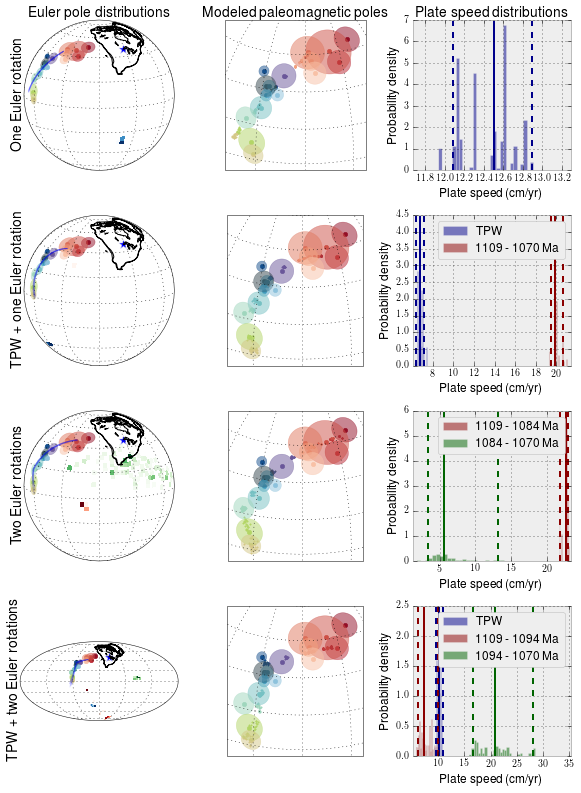

In [3]:
fig = plt.figure(figsize=(8,11))

index = 1
def plot_row(path, title, proj = 'O'):
    global index
    if proj == 'M':
        ax1 = fig.add_subplot(4,3,index, projection = ccrs.Mollweide(240.-apw_path.lon_shift))
    elif proj == 'O':
        ax1 = fig.add_subplot(4,3,index, projection = ccrs.Orthographic(240.-apw_path.lon_shift, 10))
    else:
        raise Exception('Unsupported projection')
        
    ax2 = fig.add_subplot(4,3,index+1, projection = ccrs.Orthographic(200-apw_path.lon_shift,30.))
    ax3 = fig.add_subplot(4,3,index+2)
    plotting.plot_synthetic_paths(path, poles, pole_colors, ax1)
    plotting.plot_synthetic_poles(path, poles, pole_colors, ax2)
    plotting.plot_plate_speeds(path, poles, ax3)
    if index == 1:
        ax1.text(0.5, 1., 'Euler pole distributions',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax1.transAxes)
        ax2.text(0.5, 1., 'Modeled paleomagnetic poles',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax2.transAxes)
        ax3.text(0.5, 1., 'Plate speed distributions',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax3.transAxes)
    ax1.text(0., 0.5, title,
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        size=14,
        transform=ax1.transAxes)
    index += 3

plot_row(path1, 'One Euler rotation')
plot_row(path3, 'TPW + one Euler rotation')
plot_row(path4, 'Two Euler rotations')
plot_row(path5, 'TPW + two Euler rotations', 'M')
fig.tight_layout()
plt.savefig('many_inversions.pdf')
plt.show()